In [61]:
from sklearn.datasets import fetch_openml
import numpy as np

## Section 1) Fetch of MNIST dataset 

In [62]:

mnist = fetch_openml('mnist_784') #This is an http request

## Section 2) Display and examination of the MNIST dataset

In [63]:
import matplotlib
import matplotlib.pyplot as plt

In [57]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [64]:
mnist.target = mnist.target.astype(np.int8) #preprocess the dataset and cast it as an int8. 

In [65]:
X,y = mnist['data'],mnist['target'] #set the X for the data rows and Y as the target columns

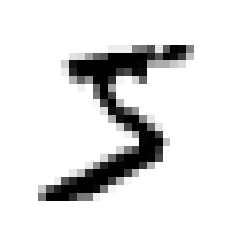

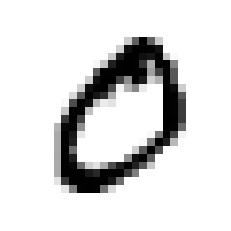

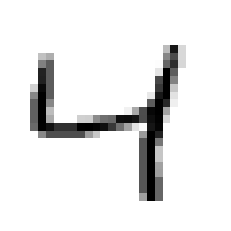

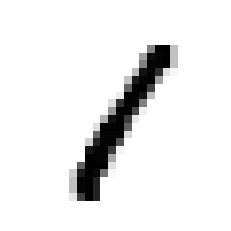

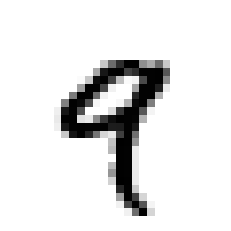

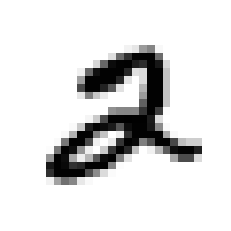

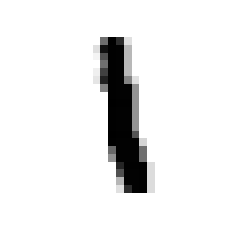

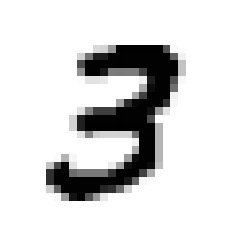

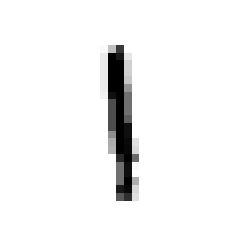

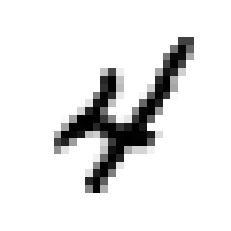

In [66]:
for i in range (10):
    number = X[i] # we loop over each data rows
    number = number.reshape(28,28) # since its a 28 by 28 image we need a 28 by 28 matrix
    plt.imshow(number,cmap = matplotlib.cm.binary) # initially it displays a greyscale image, adding the cmap build corrects the image.
    plt.axis("off") #turns off the numbred axis
    plt.show() # to remove the address message 
   


## Section 3) Train a Stochastic Gradient Descent (SGD) binary classifier

We first need to import the Stochastic Gradient package from sklearn

In [67]:
from sklearn.linear_model import SGDClassifier

Based on the description above it is recommended to split the dataset in a training set of the first 60,000 examples, and a test set of 10,000 examples  

In [68]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

From the 10 images above lets chose the number 9 to test the model with.

In [69]:
y_train_9 = y_train == 9
y_test_9 = y_train ==9

Train the model to identify if a number is a 9 or not

In [70]:
sgd = SGDClassifier(max_iter=20, tol=-np.infty) #set tolernce of -infinity to allow a maximum iteration of 20, to decrease the amount of time it takes to train.
sgd.fit(X_train,y_train_9)

SGDClassifier(max_iter=20, tol=-inf)

Let us try if the model correctly identifies if a number is NOT a 9 by testing it with the first image of the dataset

In [71]:
sgd.predict([X[0]])

array([False])

We know the 4th image of the dataset is a 9 so let us check if the model correctly identifies it.

In [72]:
sgd.predict([X[4]])

array([ True])

## Section 4) Determine the precision of your SGD classifier using a Confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

Train the model to identify all the numbers in the dataset.

In [74]:
sgd = SGDClassifier(max_iter=20, tol=-np.infty)
sgd.fit(X_train,y_train) 

SGDClassifier(max_iter=20, tol=-inf)

Predict all values in the test set

In [75]:
y_pred = sgd.predict(X_test)

Generate a confustion matrix

In [76]:
matrix = confusion_matrix(y_test,y_pred)

In [77]:
print(matrix)

[[ 954    0    0    1    1    0    7    3   12    2]
 [   0 1025    1    3    0    0    4    1   88   13]
 [  13    9  684   38    7    1   24   15  235    6]
 [   7    1    6  844    2    8    4   10  117   11]
 [   4    1    3    2  833    0   12    3   55   69]
 [  26    4    1   43    1  499   29    9  270   10]
 [  13    3    3    3    6    2  885    1   42    0]
 [   6    3    7    5    5    2    1  899   19   81]
 [   6    3    2    8    4    2    1    7  931   10]
 [   9    4    1    9   11    1    0   16   51  907]]


In [78]:
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       980
           1       0.97      0.90      0.94      1135
           2       0.97      0.66      0.79      1032
           3       0.88      0.84      0.86      1010
           4       0.96      0.85      0.90       982
           5       0.97      0.56      0.71       892
           6       0.92      0.92      0.92       958
           7       0.93      0.87      0.90      1028
           8       0.51      0.96      0.67       974
           9       0.82      0.90      0.86      1009

    accuracy                           0.85     10000
   macro avg       0.88      0.84      0.85     10000
weighted avg       0.89      0.85      0.85     10000



In [79]:
accuracy = accuracy_score(y_test, y_pred) # determine the precision of the model
print('SGD Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))


SGD Classifier Accuracy of the model: 84.61%
